AttributeError: This method only works with the ScalarFormatter

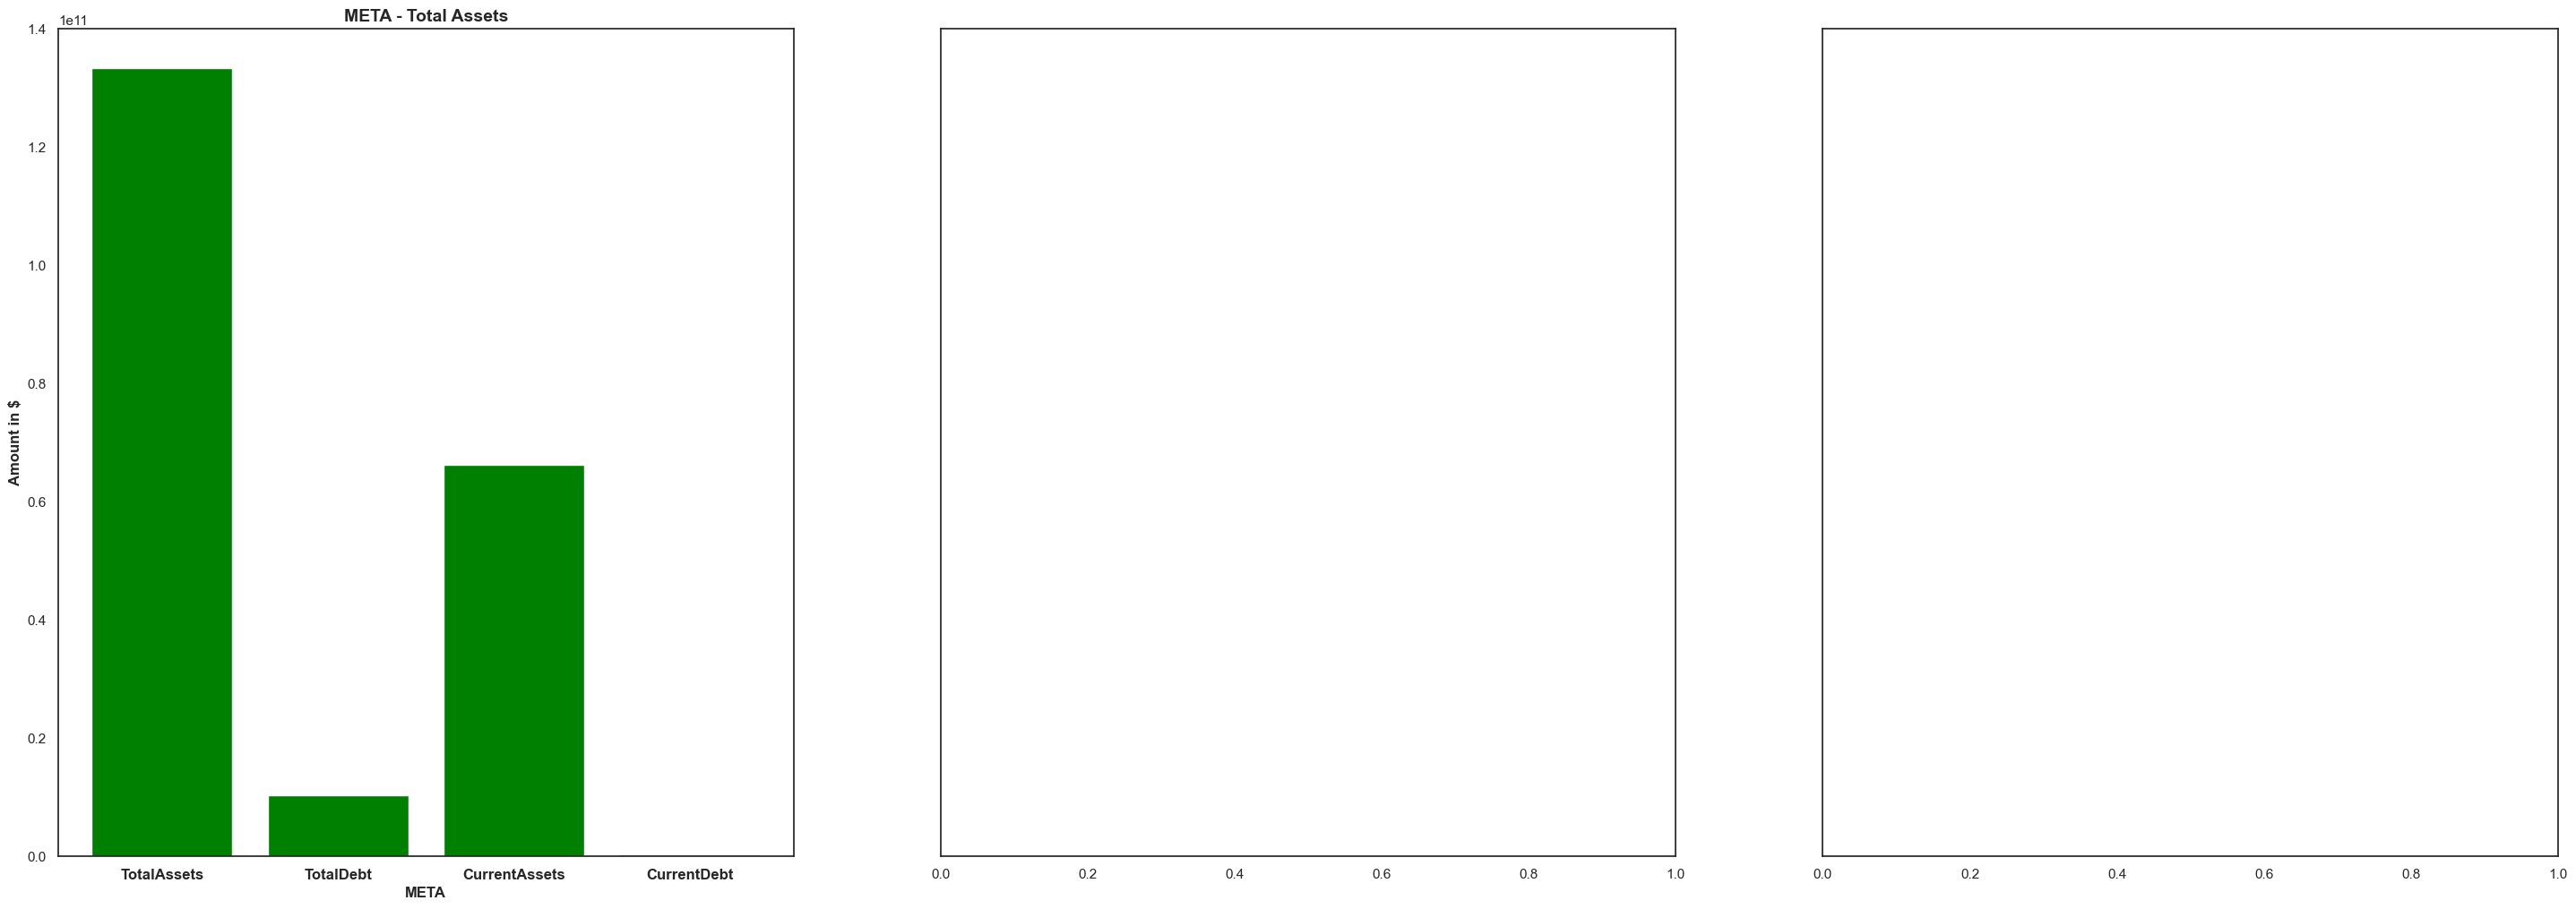

In [22]:
import sys
sys.path.append('../group-1')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as font_manager

def compare_balance_sheets(ticker_list: list):
    num_charts = len(ticker_list)

    # Create a single figure object and subplots
    fig, axes = plt.subplots(1, num_charts, figsize=(12*num_charts, 12), sharey=True)

    # Set font properties
    font = font_manager.FontProperties(weight='bold', size=12)

    for i, ticker in enumerate(ticker_list):
        assets_debt = pd.read_csv(r'../Companies_Data/'+ticker+'_Data/'+ticker+'_balance_sheet_4Y+4Q.csv')
        selected_data = assets_debt[['TotalAssets', 'TotalDebt', 'CurrentAssets', 'CurrentDebt']]

        sns.set(style="whitegrid")  # Set seaborn style

        # Create bar plot for Total Assets
        ax = axes[i]
        ax.bar(range(len(selected_data.columns)), selected_data.iloc[0], color='green')
        ax.set_title(f'{ticker} - Total Assets', fontproperties=font, fontsize=14, weight='bold')
        ax.set_xlabel(ticker, fontproperties=font)
        ax.set_ylabel('Amount in $', fontproperties=font)
        ax.set_xticks(range(len(selected_data.columns)))
        ax.set_xticklabels(selected_data.columns, fontproperties=font)

        # Remove background grid
        ax.grid(False)

        # Remove scientific notation
        ax.ticklabel_format(style='plain')

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()

ticker_list = ['META', 'AAPL', 'KO']
compare_balance_sheets(ticker_list)

